In [817]:
#import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## 1. Reading and understanding data

In [818]:
# reading the data dataframe

bike_day_data = pd.read_csv("day.csv")
bike_day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [819]:
pd.set_option('display.max_columns', None)

In [820]:
# Dropping column 'instant' as it is just like the index of the data
# Dropping column 'dteday' as the day, month, year details are given separately
# Dropping column 'casual' and 'registered' as they are target variables in nature

bike_day_data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [821]:
bike_day_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [822]:
bike_day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## 2. Data Cleaning

In [823]:
bike_day_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [824]:
bike_day_data.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [825]:
bike_day_data.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [826]:
bike_day_data.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [827]:
bike_day_data.weekday.value_counts()

1    105
2    105
0    104
3    104
4    104
5    104
6    104
Name: weekday, dtype: int64

In [828]:
# Replacing the values of season,mnth,weekday,weathersit to string categories as they are not variables having continious values as given

bike_day_data.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace= True)
bike_day_data.mnth.replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}, inplace=True)
bike_day_data.weekday.replace({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}, inplace=True)
bike_day_data.weathersit.replace({1:'clear', 2:'cloudy', 3:'light snow,rain', 4:'heavy snow,rain'}, inplace= True)

In [829]:
bike_day_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Tue,1,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Wed,1,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Thu,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Fri,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Sat,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [830]:
bike_day_data.season.unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [831]:
bike_day_data.mnth.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [832]:
bike_day_data.weekday.unique()

array(['Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon'], dtype=object)

In [833]:
bike_day_data.weathersit.unique()

array(['cloudy', 'clear', 'light snow,rain'], dtype=object)

In [834]:
bike_day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## 3. Visualising the data

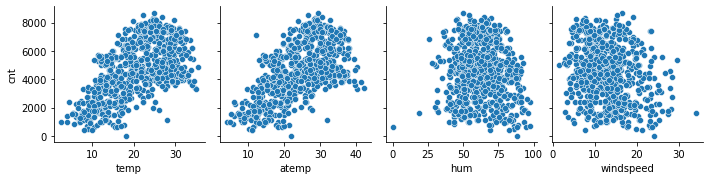

In [835]:
# Visualising numeric variables

sns.pairplot(bike_day_data, x_vars=['temp','atemp','hum','windspeed'] , y_vars='cnt')

In [836]:
# We can see that variables 'temp' and 'atemp' have a slight possitive correlation with count
# Also as we know registered users and directly correlated to count

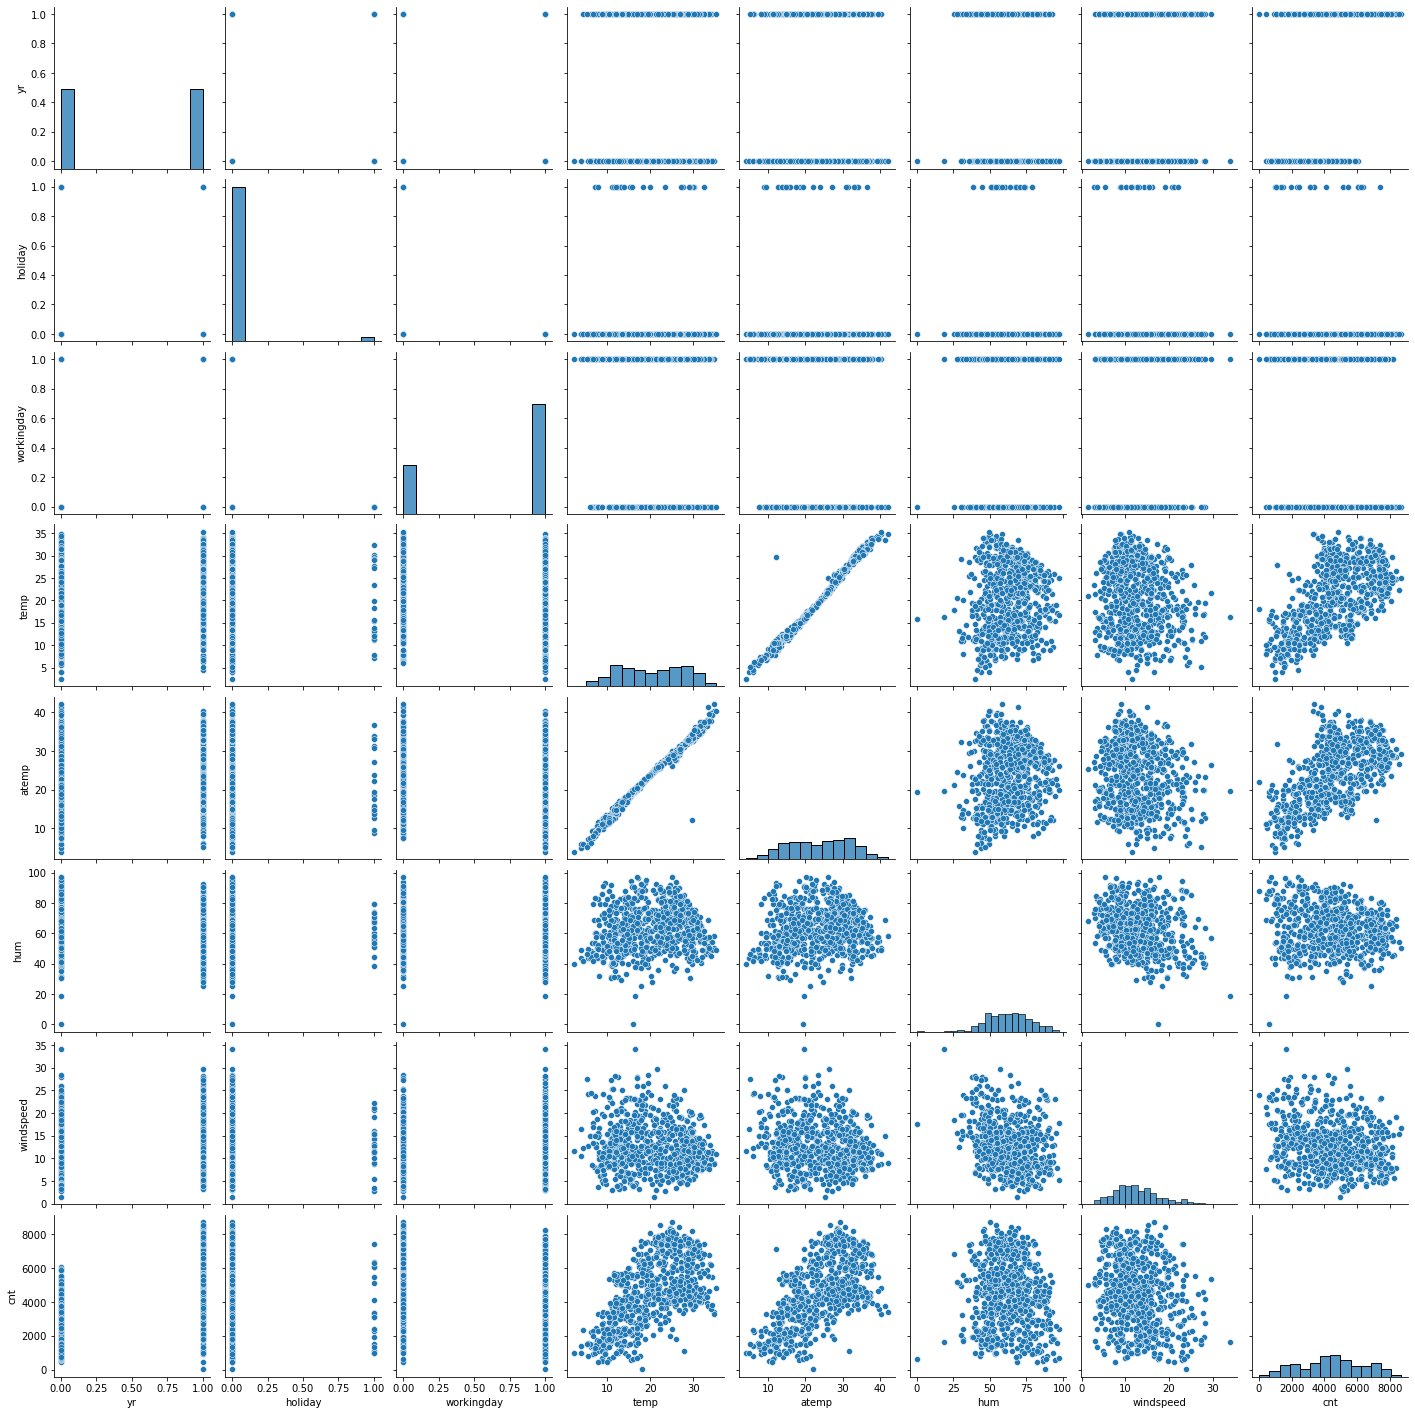

In [837]:
sns.pairplot(bike_day_data)
plt.show()

In [838]:
# From the above graphs we can see that there is high correlation between the independent varialbles 'temp' and 'atemp'
# Thus dropping the 'atemp' variable

bike_day_data.drop('atemp', axis=1, inplace=True)

In [839]:
bike_day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

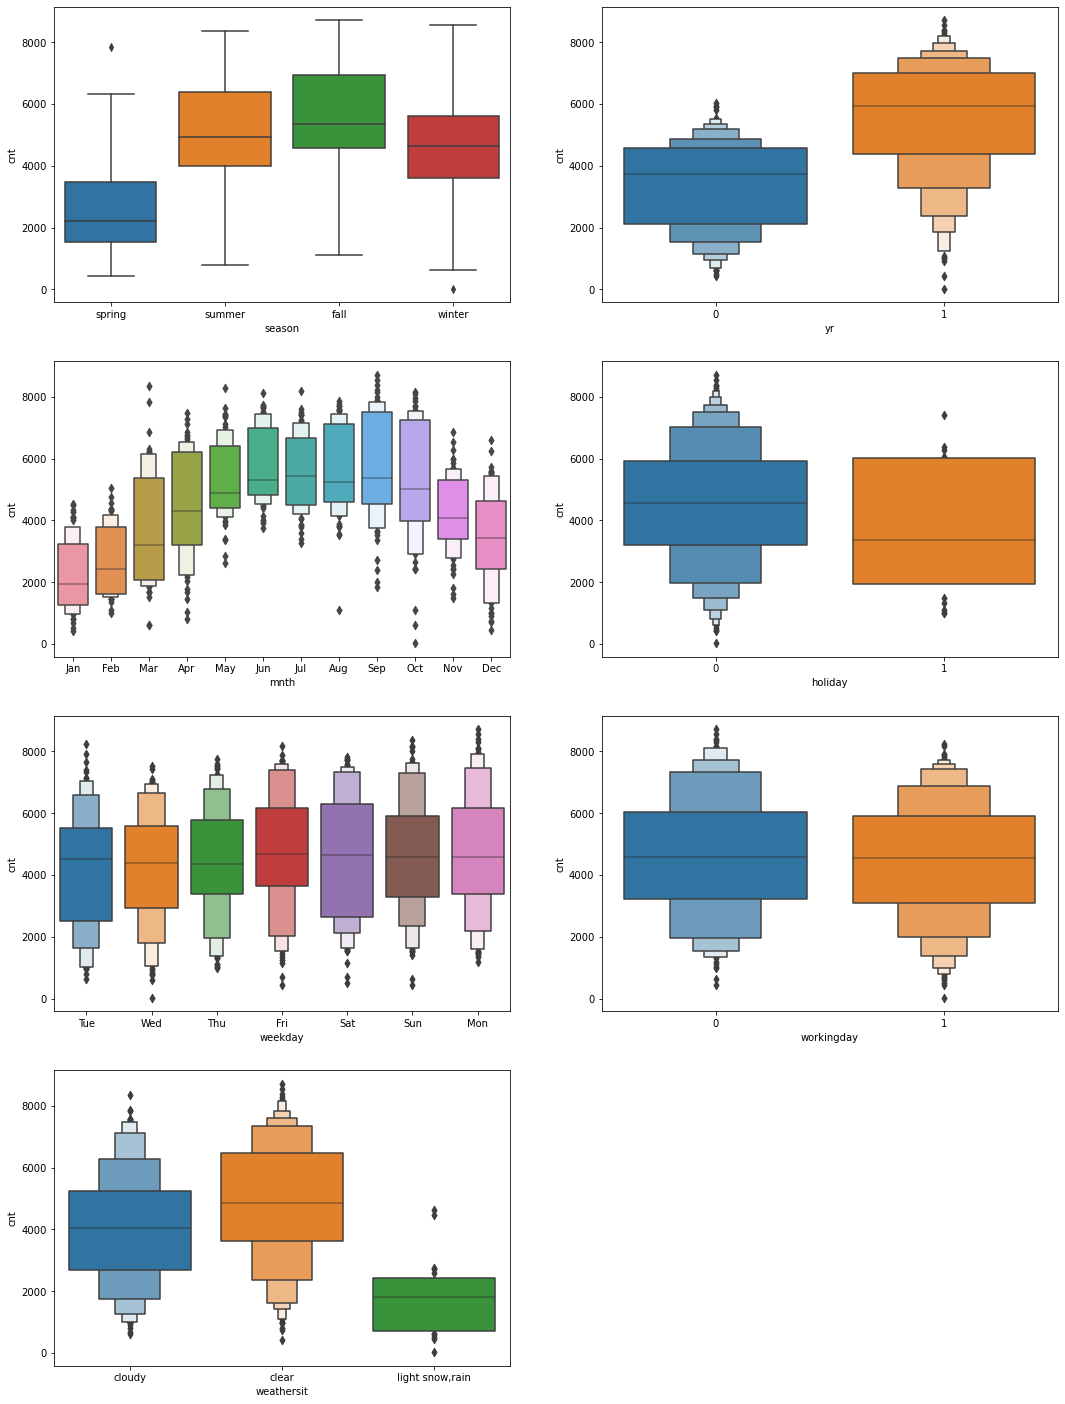

In [840]:
# Visualising categorical variabls

plt.figure(figsize=(18,25))
plt.subplot(4,2,1)
sns.boxplot(data=bike_day_data , x='season' , y='cnt')
plt.subplot(4,2,2)
sns.boxenplot(data=bike_day_data , x='yr' , y='cnt')
plt.subplot(4,2,3)
sns.boxenplot(data=bike_day_data , x='mnth' , y='cnt')
plt.subplot(4,2,4)
sns.boxenplot(data=bike_day_data , x='holiday' , y='cnt')
plt.subplot(4,2,5)
sns.boxenplot(data=bike_day_data , x='weekday' , y='cnt')
plt.subplot(4,2,6)
sns.boxenplot(data=bike_day_data , x='workingday' , y='cnt')
plt.subplot(4,2,7)
sns.boxenplot(data=bike_day_data , x='weathersit' , y='cnt')

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

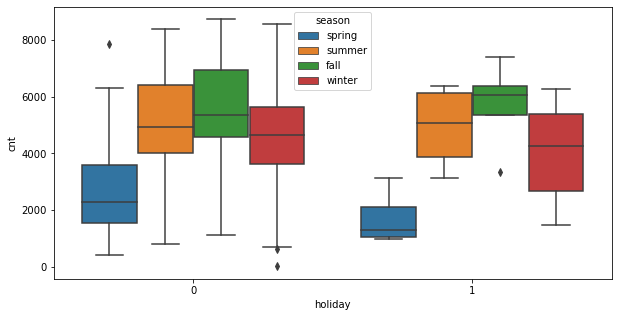

In [841]:
plt.figure(figsize=(10,5))
sns.boxplot(data= bike_day_data , x='holiday' , y='cnt' , hue='season')

In [842]:
# From the visualisations above we can see that 
# 1. There is a huge growth in second year
# 2. Months may to october has highest count similar observations are there in the corresponding seasons
# 3. The count is less on special holidays

## 4. Data preparation

In [843]:
bike_day_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Tue,1,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Wed,1,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Thu,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Fri,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Sat,1,clear,9.305237,43.6957,12.522300,1600


### Creating Dummy Varialbes

##### We need to convert categorical variables into numeric values to make the model as we have to fit a line

In [844]:
# Creating dummy varialbes for categorical values

seasons= pd.get_dummies(bike_day_data.season, drop_first=True)
month=pd.get_dummies(bike_day_data.mnth, drop_first=True)
week=pd. get_dummies(bike_day_data.weekday, drop_first=True)
weather = pd.get_dummies(bike_day_data.weathersit, drop_first=True)

In [845]:
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [846]:
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [847]:
bike_day_data= pd.concat([bike_day_data,seasons,month,week,weather], axis=1)

In [848]:
bike_day_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,cloudy,"light snow,rain"
0,spring,0,Jan,0,Tue,1,cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,spring,0,Jan,0,Wed,1,cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,spring,0,Jan,0,Thu,1,clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,spring,0,Jan,0,Fri,1,clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,spring,0,Jan,0,Sat,1,clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [849]:
# Dropping columns 'season' and 'weathersit' as correspoding dummy variables are created

bike_day_data.drop(['season','mnth','weekday','weathersit'], axis=1,inplace=True)

In [850]:
bike_day_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,cloudy,"light snow,rain"
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [851]:
bike_day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   hum              730 non-null    float64
 5   windspeed        730 non-null    float64
 6   cnt              730 non-null    int64  
 7   spring           730 non-null    uint8  
 8   summer           730 non-null    uint8  
 9   winter           730 non-null    uint8  
 10  Aug              730 non-null    uint8  
 11  Dec              730 non-null    uint8  
 12  Feb              730 non-null    uint8  
 13  Jan              730 non-null    uint8  
 14  Jul              730 non-null    uint8  
 15  Jun              730 non-null    uint8  
 16  Mar              730 non-null    uint8  
 17  May             

## 5. Splitting data into train and test sets

In [852]:
np.random.seed(0)
bike_day_data_train, bike_day_data_test = train_test_split(bike_day_data, train_size=0.7, test_size=0.3, random_state=100)

In [853]:
bike_day_data_train.shape

(510, 29)

In [854]:
bike_day_data_test.shape

(219, 29)

In [855]:
# Scale the test data using MinMax method

scale = MinMaxScaler()

In [856]:
# Applying scale() to all numeric variables

nvar = ['temp','hum','windspeed','cnt']

bike_day_data_train[nvar] = scale.fit_transform(bike_day_data_train[nvar])

In [857]:
bike_day_data_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,cloudy,"light snow,rain"
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [858]:
bike_day_data_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,cloudy,"light snow,rain"
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.137255,0.147059,0.129412,0.135294,0.154902,0.152941,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.344454,0.354512,0.335985,0.342373,0.362166,0.360284,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for model building

In [859]:
y_train = bike_day_data_train.pop('cnt')
x_train = bike_day_data_train

## 6. Data Modelling

### RFE

In [860]:
# RFE with output number of variable 10

lr = LinearRegression()
lr.fit(x_train,y_train)

rfe= RFE(lr, 12)
rfe = rfe.fit(x_train,y_train)

In [861]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 12),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 16),
 ('Mar', False, 17),
 ('May', False, 9),
 ('Nov', False, 3),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 15),
 ('Sun', False, 7),
 ('Thu', False, 13),
 ('Tue', False, 11),
 ('Wed', False, 10),
 ('cloudy', True, 1),
 ('light snow,rain', True, 1)]

In [862]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Jul', 'Sep', 'cloudy', 'light snow,rain'],
      dtype='object')

### Building the model using Statsmodel

In [863]:
# creating the x_train data with RFE selected variables

x_train_rfe = x_train[col]

In [864]:
# Adding constant variable

x_train_rfe = sm.add_constant(x_train_rfe)

In [865]:
# Running the linear model

lm = sm.OLS(y_train,x_train_rfe).fit()

In [866]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.69e-190
Time:                        23:32:45   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2841      0.034     

In [867]:
# From above data we can see that we can get a decent model R-squared and Adj. R-squared about 84%

In [869]:
# Finding the VIF of the variables

x_train_rfe.pop('const')
vif = pd.DataFrame()
x= x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,28.06
2,temp,16.02
4,windspeed,4.65
5,spring,4.01
7,winter,3.35
6,summer,2.78
10,cloudy,2.28
0,yr,2.08
8,Jul,1.58
9,Sep,1.38


In [870]:
# From above datas we can see that the VIF of 'hum' is very high
# Thus dropping the variable 'hum'

x_train_rfe.pop('hum')

653    0.575354
576    0.725633
426    0.640189
728    0.498067
482    0.504508
         ...   
526    0.605840
578    0.679690
53     0.435939
350    0.577930
79     0.759870
Name: hum, Length: 510, dtype: float64

In [871]:
# Creating the model for new set of variables

x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe).fit()

In [872]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.40e-187
Time:                        23:32:45   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1996      0.030     

In [873]:
# Finding the VIF of new set of variables
x_train_rfe.pop('const')
vif = pd.DataFrame()
x= x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.21
4,spring,2.08
0,yr,2.07
6,winter,1.79
7,Jul,1.58
9,cloudy,1.55
8,Sep,1.34
10,"light snow,rain",1.08


In [874]:
# Now we can see that all p-values are fine but VIF of temp is higher than 5.
# But we cannot drop temp as we know temparature is a significant variable.
# Thus by logic as month and season are related we drop a month Jul and run the model

x_train_rfe.pop('Jul')

653    0
576    1
426    0
728    0
482    0
      ..
526    0
578    0
53     0
350    0
79     0
Name: Jul, Length: 510, dtype: uint8

In [875]:
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          7.36e-187
Time:                        23:32:45   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1910      0.030     

In [876]:
# Finding the VIF of new set of variables
x_train_rfe.pop('const')
vif = pd.DataFrame()
x= x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
4,spring,1.99
5,summer,1.89
6,winter,1.63
8,cloudy,1.54
7,Sep,1.23
9,"light snow,rain",1.08
1,holiday,1.04


In [889]:
# For this model we can see that the p-values are all less than 0.05 and VIF values are all less than 5
# Also the model has a R-squared value of 83% which is a good model

## 7. Residual analysis on the train data

In [877]:
# Lets plot the error terms using histogram to check wether they are normally distributed or not

x_train_rfe = sm.add_constant(x_train_rfe)
y_train_cnt = lm.predict(x_train_rfe)

Text(0.5, 0, 'Errors')

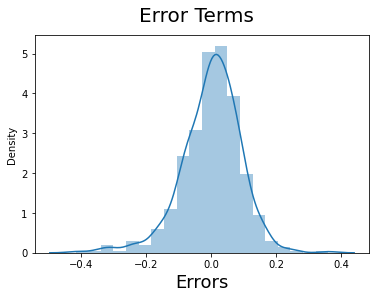

In [878]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [879]:
# From the above plot we can see that the error terms are normally distributed

## 8. Making predictions using final model

In [880]:
# Scale the test data usong the MinMaxScaler()

bike_day_data_test[nvar] = scale.fit_transform(bike_day_data_test[nvar])

In [881]:
bike_day_data_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,cloudy,"light snow,rain"
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.546312,0.508750,0.418870,0.516216,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.155251,0.132420,0.173516,0.155251,0.118721,0.123288,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.249189,0.201253,0.188111,0.238702,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.362974,0.339723,0.379560,0.362974,0.324202,0.329520,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.651165,0.524362,0.682487,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [882]:
# Dividing test data into x_test and y_test

y_test = bike_day_data_test.pop('cnt')
x_test = bike_day_data_test

In [883]:
# Dropping columns as done in train data

x_test = x_test[col]

In [884]:
x_test.pop('hum')
x_test.pop('Jul')

184    1
535    0
299    0
221    0
152    0
      ..
400    0
702    0
127    0
640    0
72     0
Name: Jul, Length: 219, dtype: uint8

In [885]:
# Adding constant

x_test = sm.add_constant(x_test)

In [886]:
# Predicting the values for test data

y_pred = lm.predict(x_test)

## 8. Model Evaluation

Text(0, 0.5, 'y_pred')

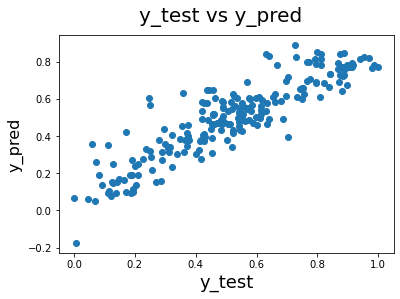

In [887]:
# Lets plot graph between actual and predicted values

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

In [888]:
r2_score(y_test, y_pred)

0.7942494090079091

### The equation for the best fit line is : 

$ cnt = 0.2341 * yr - 0.0969 * holiday + 0.4782 * temp - 0.1482 * windspeed - 0.0551 * spring + 0.0610 * summer + 0.0959 * winter + 0.0909 * Sep - 0.0801 * cloudy - 0.2860 * light snow,rain $

#### Here we can see that the train model has a R squared value of 83%
#### The test model gives a R squared value of 79%
#### Thus we can conlcude that the model is a good model